<a href="https://colab.research.google.com/github/pedro21900/Cloud_service/blob/main/Laborat%C3%B3rio_de_previss%C3%A3o(bicicletas_alugadas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratório de regressão

## Conversão de temperatura

#### Importando bibliotecas


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tf.__version__

'2.14.0'

#### Importação de arquivo

In [ ]:
temperature_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop=True,inplace=True)
print(temperature_df)

#Primeiro 5
#print(temperature_df.head())

#Ultimos 5
#print(temperature_df.tail(5))
#Informações
print(temperature_df.info())

    Celsius  Fahrenheit
0       -50       -58.0
1       -40       -40.0
2       -30       -22.0
3       -20        -4.0
4       -10        14.0
5        -9        15.8
6        -8        17.6
7        -7        19.4
8        -6        21.2
9        -5        23.0
10       -4        24.8
11       -3        26.6
12       -2        28.4
13       -1        30.2
14        0        32.0
15        1        33.8
16        2        35.6
17        3        37.4
18        4        39.2
19        5        41.0
20        6        42.8
21        7        44.6
22        8        46.4
23        9        48.2
24       10        50.0
25       20        68.0
26       30        86.0
27       40       104.0
28       50       122.0
29       60       140.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null   

### Visualização de dados

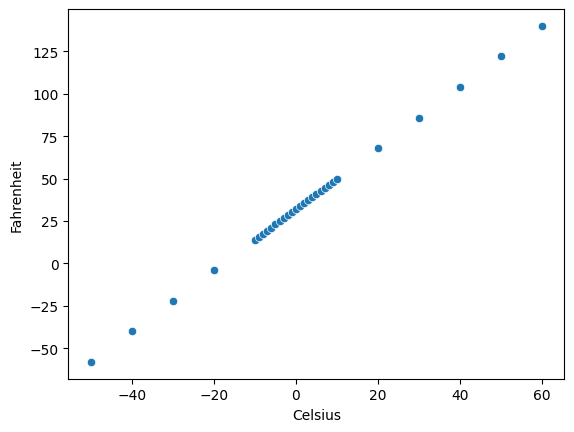

In [ ]:
sns.scatterplot(x=temperature_df['Celsius'],y=temperature_df['Fahrenheit']);

### Configurando a base de treinamento

In [ ]:
x_train = temperature_df['Celsius'];
y_train=temperature_df['Fahrenheit'];

print(f'x_train possui {x_train.shape} registros' );
print(f'y_train possui {y_train.shape} registros' );


x_train possui (30,) registros
y_train possui (30,) registros


### Construção do modelo

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1 , input_shape=[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')
epochs_hist = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 977ms/step - loss: 1260.9476
Epoch 2/200
1/1 [==============================] - 0s 27ms/step - loss: 1189.0245
Epoch 3/200
1/1 [==============================] - 0s 29ms/step - loss: 1127.6696
Epoch 4/200
1/1 [==============================] - 0s 15ms/step - loss: 1076.9406
Epoch 5/200
1/1 [==============================] - 0s 30ms/step - loss: 1036.6937
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 1006.5079
Epoch 7/200
1/1 [==============================] - 0s 23ms/step - loss: 985.6051
Epoch 8/200
1/1 [==============================] - 0s 18ms/step - loss: 972.7888
Epoch 9/200
1/1 [==============================] - 0s 15ms/step - loss: 966.4366
Epoch 10/200
1/1 [==============================] - 0s 27ms/step - loss: 964.5906
Epoch 11/200
1/1 [==============================] - 0s 25ms/step - loss: 965.1578
Epoch 12/200
1/1 [==============================] - 0s 21ms/step - loss: 966.1866
Epoch 13/200
1/1 [

### Avaliação do modelo

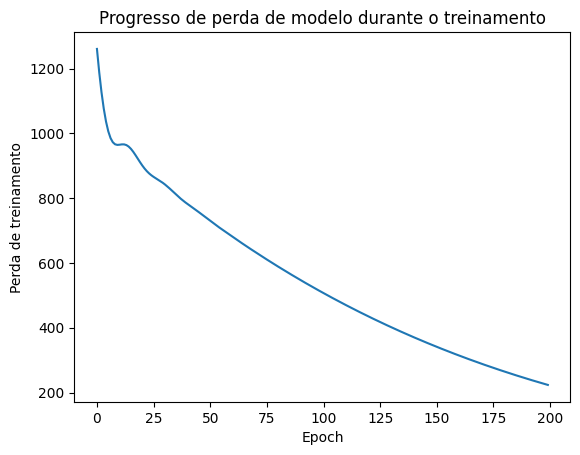

In [ ]:
 plt.plot(epochs_hist.history['loss']);
 plt.title('Progresso de perda de modelo durante o treinamento');
 plt.xlabel('Epoch');
 plt.ylabel('Perda de treinamento');

In [ ]:
print(model.get_weights())

[array([[1.8593438]], dtype=float32), array([17.061016], dtype=float32)]


In [ ]:
temp_c=[0,1,2,10]
temp_f = model.predict(temp_c)
print(temp_f.round(2))

formula=lambda temp_c: temp_c *(9/5)+32
for cecius in temp_c:
  print(formula(cecius))

1/1 [==============================] - 0s 95ms/step
[[17.06]
 [18.92]
 [20.78]
 [35.65]]
32.0
33.8
35.6
50.0


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

print(x_train.shape)
print(y_train.shape)

regressor.fit(x_train,y_train)

revenue = regressor.predict(np.array(temp_c).reshape(-1, 1))

print('Revenue = ', revenue)

#Fomula padrõe de conversão de temperatura °C e °F
formula=lambda temp_c: temp_c *(9/5)+32
for cecius in temp_c:
  print(formula(cecius))

(30, 1)
(30, 1)
Revenue =  [[32. ]
 [33.8]
 [35.6]
 [50. ]]
32.0
33.8
35.6
50.0
